In [1]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd

In [2]:
website = 'https://www.coingecko.com'

In [3]:
response = requests.get(website)

In [4]:
soup = bs(response.content, 'html.parser')

In [5]:
results = soup.find('table', {'class':'table-scrollable'}).find('tbody').find_all('tr')

### Nome

In [6]:
#Vamos pegar o nome do primeiro ativo
results[0].find('a', {'class': 'tw-hidden lg:tw-flex font-bold tw-items-center tw-justify-between'}).get_text().strip()

'Bitcoin'

### Preço

In [7]:
#Vamos acessar o preço do primeiro ativo

results[0].find('td', {'class': 'td-price price text-right pl-0'}).get_text().strip()

'$39,588.45'

### Variação 24h

In [8]:
#Esta é a variação do ativo nas últimas 24h

results[0].find('td', {'class': 'td-change24h'}).get_text().strip()

'-0.0%'

### Volume 24h

In [9]:
#Este é o volume negociado no ativo nas últimas 24h

results[0].find('td', {'class': 'td-liquidity_score'}).get_text().strip()

'$16,019,115,909'

### Valor de Mercado

In [10]:
#Agora vamos acessar valor de mercado total do primeiro ativo

results[0].find('td', {'class': 'td-market_cap'}).get_text().strip()

'$751,202,478,749'

## Loop para coletar dados de todas as linhas
Como coletamos os resultados apenas do primeiro ativo, precisamos requisitar as infos dos outros


In [11]:
#Vamos começar criando listas vazias para preencher com os valores que desejamos

nome = []
preco = []
variacao = []
volume = []
mercado = []

In [12]:
#Vamos criar o loop para coletar os nomes unitariamente

for result in results:
    
    #nome
    try:
        nome.append(result.find('a', {'class': 'tw-hidden lg:tw-flex font-bold tw-items-center tw-justify-between'}).get_text().strip())
    except:
        nome.append('n/a')

In [13]:
#Agora que temos um loop para os nomes, vamos criar um loop para cada uma das outras informações necessárias

for result in results:
    
    #preço
    try:
        preco.append(result.find('td', {'class': 'td-price price text-right pl-0'}).get_text().strip())
    except:
        preco.append('n/a')
        
        
    #Variação
    try:
        variacao.append(result.find('td', {'class': 'td-change24h'}).get_text().strip())
    except:
        variacao.append('n/a')
            
            
    #Volume
    try:
        volume.append(result.find('td', {'class': 'td-liquidity_score'}).get_text().strip())
    except:
        volume.append('n/a')        
     
    
    #Valor de Mercado
    try:
        mercado.append(result.find('td', {'class': 'td-market_cap'}).get_text().strip())
    except:
        mercado.append('n/a')       

## Listando os valores num mesmo objeto

In [19]:
#Vamos criar um Pandas dataframe para armazenar os campos coletados no scrapping

tabela_cripto = pd.DataFrame({'Criptoativo': nome, 'Preço': preco, 'Variação': variacao, 'Volume 24h': volume, 'MarketCap': mercado})

## Vamos olhar a tabela pronta

In [21]:
display(tabela_cripto)

,Criptoativo,Preço,Variação,Volume 24h,MarketCap
0,Bitcoin,"$39,588.45",-0.0%,"$16,019,115,909","$751,202,478,749"
1,Ethereum,"$2,672.37",1.7%,"$9,425,551,140","$320,255,620,545"
2,Tether,$1.00,-0.3%,"$42,167,412,366","$79,826,262,904"
3,BNB,$385.53,2.0%,"$1,258,140,930","$64,821,849,307"
4,USD Coin,$1.00,-0.1%,"$2,234,536,461","$53,028,298,255"
...,...,...,...,...,...
95,Dash,$89.87,-0.6%,"$97,958,429","$953,625,911"
96,Loopring,$0.763403,3.5%,"$92,940,252","$951,194,067"
97,Convex Finance,$17.74,6.8%,"$47,622,682","$944,906,198"
98,Curve DAO Token,$2.26,-1.1%,"$102,854,654","$887,152,506"


## Mas fizemos a raspagem de apenas uma página. Como raspar múltiplas páginas e coletar os dados dos 100 ativos de cada página?

### Paginação do scrapping

Ao navegar pelas páginas, a alteração do link se dá desta forma:
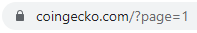
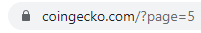

Vamos usar este padrão para coletar infos de diversas páginas em looping

In [66]:
#Vamos limpar nossas listas usadas no exemplo anterior, pois os valores trazidos pelo loop serão outros

nome = []
preco = []
variacao = []
volume = []
mercado = []

paginas = int(input('Quantas páginas de dados você deseja? '))

Quantas páginas de dados você deseja? 10


In [67]:
#Agora vamos criar um looping para alterar os links de acordo com o padrão informado anteriormente:

for i in range (1,(paginas + 1)):
    #Vamos criar um link através do looping
    website = 'https://www.coingecko.com/?page=' + str(i)
    
    #Agora vamos solicitar um request da página informada no website a cada iteração
    response = requests.get(website)
    
    #Cada html deverá passar por um objeto soup
    soup = bs(response.content, 'html.parser')
    
    #Os resultados do soup serão armazenados no results a cada iteração
    results = soup.find('table', {'class': 'table-scrollable'}).find('tbody').find_all('tr')
    
    #Agora vamos acessar os valores das variáveis definidas anteriormente
    #Para isso vamos fazer um looping a partir de da variável Results
    
    for result in results:
    
        #Nome
        try:
            nome.append(result.find('a', {'class': 'tw-hidden lg:tw-flex font-bold tw-items-center tw-justify-between'}).get_text().strip())
        except:
            nome.append('n/a')

        #Preço
        try:
            preco.append(result.find('td', {'class': 'td-price price text-right pl-0'}).get_text().strip())
        except:
            preco.append('n/a')


        #Variação
        try:
            variacao.append(result.find('td', {'class': 'td-change24h'}).get_text().strip())
        except:
            variacao.append('n/a')


        #Volume
        try:
            volume.append(result.find('td', {'class': 'td-liquidity_score'}).get_text().strip())
        except:
            volume.append('n/a')        


        #Valor de Mercado
        try:
            mercado.append(result.find('td', {'class': 'td-market_cap'}).get_text().strip())
        except:
            mercado.append('n/a')       

In [68]:
#Com os dados em mão, vamos inserí-los a um dataframe, como fizemos anteriormente
tabela_cripto = pd.DataFrame({'Criptoativo': nome, 'Preço': preco, 'Variação': variacao, 'Volume 24h': volume, 'MarketCap': mercado})

In [69]:
display(tabela_cripto)

,Criptoativo,Preço,Variação,Volume 24h,MarketCap
0,Bitcoin,"$39,394.65",1.0%,"$15,816,928,454","$747,477,300,348"
1,Ethereum,"$2,660.64",1.9%,"$9,311,907,252","$318,517,794,949"
2,Tether,$1.00,-0.0%,"$41,586,859,997","$79,743,169,190"
3,BNB,$384.38,1.8%,"$1,226,687,193","$64,517,231,046"
4,USD Coin,$1.00,-0.1%,"$2,168,635,240","$52,908,396,681"
...,...,...,...,...,...
995,Electra Protocol,$0.000746111098,-6.8%,"$22,496.09","$12,943,539"
996,Birake,$0.122375,0.7%,"$3,995.37","$12,922,128"
997,Cindicator,$0.006691987920,112.9%,"$14,405,583","$12,915,346"
998,VCGamers,$0.129564,14.6%,"$537,971","$12,876,676"


### Rodei o programa e coloquei 10 páginas para obter dados, e o dataframe ficou com 1000 registros.
#### A quantidade de páginas pode ser facilmente alterada algumas células acima

Por fim, vamos salvar os resultados numa pasta do Excel

In [70]:
tabela_cripto.to_excel('Varias_paginas.xlsx', index = False)